<a href="https://colab.research.google.com/github/G33kyGuy3/DataSci/blob/main/Empoyee_Attrition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle

In [3]:
pd.options.display.max_columns = None

emp_turnover = pd.read_excel("/content/Employee Attrition Data.xlsx")
emp_turnover = shuffle(attrition)
emp_turnover.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
469,44,No,Travel_Rarely,1313,Research & Development,7,3,Medical,1,1608,2,Female,31,3,5,Research Director,4,Divorced,19049,3549,0,Y,Yes,14,3,4,80,1,23,4,2,22,7,1,10
1278,36,No,Travel_Rarely,530,Sales,2,4,Life Sciences,1,1710,3,Female,51,3,2,Sales Representative,4,Single,4502,7439,3,Y,No,15,3,3,80,0,17,2,2,13,7,6,7
968,35,No,Travel_Frequently,664,Research & Development,1,3,Medical,1,88,2,Male,79,3,1,Research Scientist,1,Married,2194,5868,4,Y,No,13,3,4,80,1,5,2,2,3,2,1,2
760,34,No,Travel_Frequently,135,Research & Development,19,3,Medical,1,1285,3,Female,46,3,2,Laboratory Technician,2,Divorced,4444,22534,4,Y,No,13,3,3,80,2,15,2,4,11,8,5,10
1001,33,No,Travel_Rarely,267,Research & Development,21,3,Medical,1,1698,2,Male,79,4,1,Laboratory Technician,2,Married,2028,13637,1,Y,No,18,3,4,80,3,14,6,3,14,11,2,13
1369,35,No,Travel_Rarely,1490,Research & Development,11,4,Medical,1,2003,4,Male,43,3,1,Laboratory Technician,3,Married,2660,20232,7,Y,Yes,11,3,3,80,1,5,3,3,2,2,2,2
853,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0


In [4]:
emp_turnover_no = emp_turnover[emp_turnover['Attrition']== 'No'].iloc[:550]
emp_turnover_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
469,44,No,Travel_Rarely,1313,Research & Development,7,3,Medical,1,1608,2,Female,31,3,5,Research Director,4,Divorced,19049,3549,0,Y,Yes,14,3,4,80,1,23,4,2,22,7,1,10
1278,36,No,Travel_Rarely,530,Sales,2,4,Life Sciences,1,1710,3,Female,51,3,2,Sales Representative,4,Single,4502,7439,3,Y,No,15,3,3,80,0,17,2,2,13,7,6,7
968,35,No,Travel_Frequently,664,Research & Development,1,3,Medical,1,88,2,Male,79,3,1,Research Scientist,1,Married,2194,5868,4,Y,No,13,3,4,80,1,5,2,2,3,2,1,2
760,34,No,Travel_Frequently,135,Research & Development,19,3,Medical,1,1285,3,Female,46,3,2,Laboratory Technician,2,Divorced,4444,22534,4,Y,No,13,3,3,80,2,15,2,4,11,8,5,10
1001,33,No,Travel_Rarely,267,Research & Development,21,3,Medical,1,1698,2,Male,79,4,1,Laboratory Technician,2,Married,2028,13637,1,Y,No,18,3,4,80,3,14,6,3,14,11,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,29,No,Travel_Rarely,738,Research & Development,9,5,Other,1,455,2,Male,30,2,1,Laboratory Technician,4,Single,3983,7621,0,Y,No,17,3,3,80,0,4,2,3,3,2,2,2
660,39,No,Travel_Rarely,141,Human Resources,3,3,Human Resources,1,760,3,Female,44,4,2,Human Resources,2,Married,6389,18767,9,Y,No,15,3,3,80,1,12,3,1,8,3,3,6
33,30,No,Non-Travel,829,Research & Development,1,1,Life Sciences,1,292,3,Male,88,2,3,Manufacturing Director,3,Single,8474,20925,1,Y,No,22,4,3,80,0,12,2,3,11,8,5,8
1030,46,No,Travel_Rarely,430,Research & Development,1,4,Medical,1,1069,4,Male,40,3,5,Research Director,4,Divorced,19627,21445,9,Y,No,17,3,4,80,2,23,0,3,2,2,2,2


In [5]:
emp_turnover_yes = emp_turnover[emp_turnover['Attrition'] == 'Yes']
emp_turnover_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1119,40,Yes,Travel_Rarely,299,Sales,25,4,Marketing,1,1318,4,Male,57,2,3,Sales Executive,2,Single,9094,17235,2,Y,Yes,12,3,3,80,0,9,2,3,5,4,1,0
1414,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
623,49,Yes,Travel_Rarely,1184,Sales,11,3,Marketing,1,840,3,Female,43,3,3,Sales Executive,4,Married,7654,5860,1,Y,No,18,3,1,80,2,9,3,4,9,8,7,7
510,42,Yes,Travel_Frequently,481,Sales,12,3,Life Sciences,1,1167,3,Male,44,3,4,Sales Executive,1,Single,13758,2447,0,Y,Yes,12,3,2,80,0,22,2,2,21,9,13,14
143,58,Yes,Travel_Frequently,781,Research & Development,2,1,Life Sciences,1,918,4,Male,57,2,1,Laboratory Technician,4,Divorced,2380,13384,9,Y,Yes,14,3,4,80,1,3,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,34,Yes,Travel_Frequently,234,Research & Development,9,4,Life Sciences,1,1807,4,Male,93,3,2,Laboratory Technician,1,Married,5346,6208,4,Y,No,17,3,3,80,1,11,3,2,7,1,0,7
1284,28,Yes,Travel_Rarely,890,Research & Development,2,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
871,29,Yes,Travel_Rarely,341,Sales,1,3,Medical,1,896,2,Female,48,2,1,Sales Representative,3,Divorced,2800,23522,6,Y,Yes,19,3,3,80,3,5,3,3,3,2,0,2
217,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,3,Male,64,2,3,Sales Executive,4,Single,9619,13596,1,Y,No,16,3,4,80,0,9,3,3,9,8,4,7


In [6]:
emp_turnover = pd.concat([emp_turnover_yes,emp_turnover_no])
emp_turnover

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1119,40,Yes,Travel_Rarely,299,Sales,25,4,Marketing,1,1318,4,Male,57,2,3,Sales Executive,2,Single,9094,17235,2,Y,Yes,12,3,3,80,0,9,2,3,5,4,1,0
1414,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
623,49,Yes,Travel_Rarely,1184,Sales,11,3,Marketing,1,840,3,Female,43,3,3,Sales Executive,4,Married,7654,5860,1,Y,No,18,3,1,80,2,9,3,4,9,8,7,7
510,42,Yes,Travel_Frequently,481,Sales,12,3,Life Sciences,1,1167,3,Male,44,3,4,Sales Executive,1,Single,13758,2447,0,Y,Yes,12,3,2,80,0,22,2,2,21,9,13,14
143,58,Yes,Travel_Frequently,781,Research & Development,2,1,Life Sciences,1,918,4,Male,57,2,1,Laboratory Technician,4,Divorced,2380,13384,9,Y,Yes,14,3,4,80,1,3,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,29,No,Travel_Rarely,738,Research & Development,9,5,Other,1,455,2,Male,30,2,1,Laboratory Technician,4,Single,3983,7621,0,Y,No,17,3,3,80,0,4,2,3,3,2,2,2
660,39,No,Travel_Rarely,141,Human Resources,3,3,Human Resources,1,760,3,Female,44,4,2,Human Resources,2,Married,6389,18767,9,Y,No,15,3,3,80,1,12,3,1,8,3,3,6
33,30,No,Non-Travel,829,Research & Development,1,1,Life Sciences,1,292,3,Male,88,2,3,Manufacturing Director,3,Single,8474,20925,1,Y,No,22,4,3,80,0,12,2,3,11,8,5,8
1030,46,No,Travel_Rarely,430,Research & Development,1,4,Medical,1,1069,4,Male,40,3,5,Research Director,4,Divorced,19627,21445,9,Y,No,17,3,4,80,2,23,0,3,2,2,2,2


In [8]:
emp_turnover.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

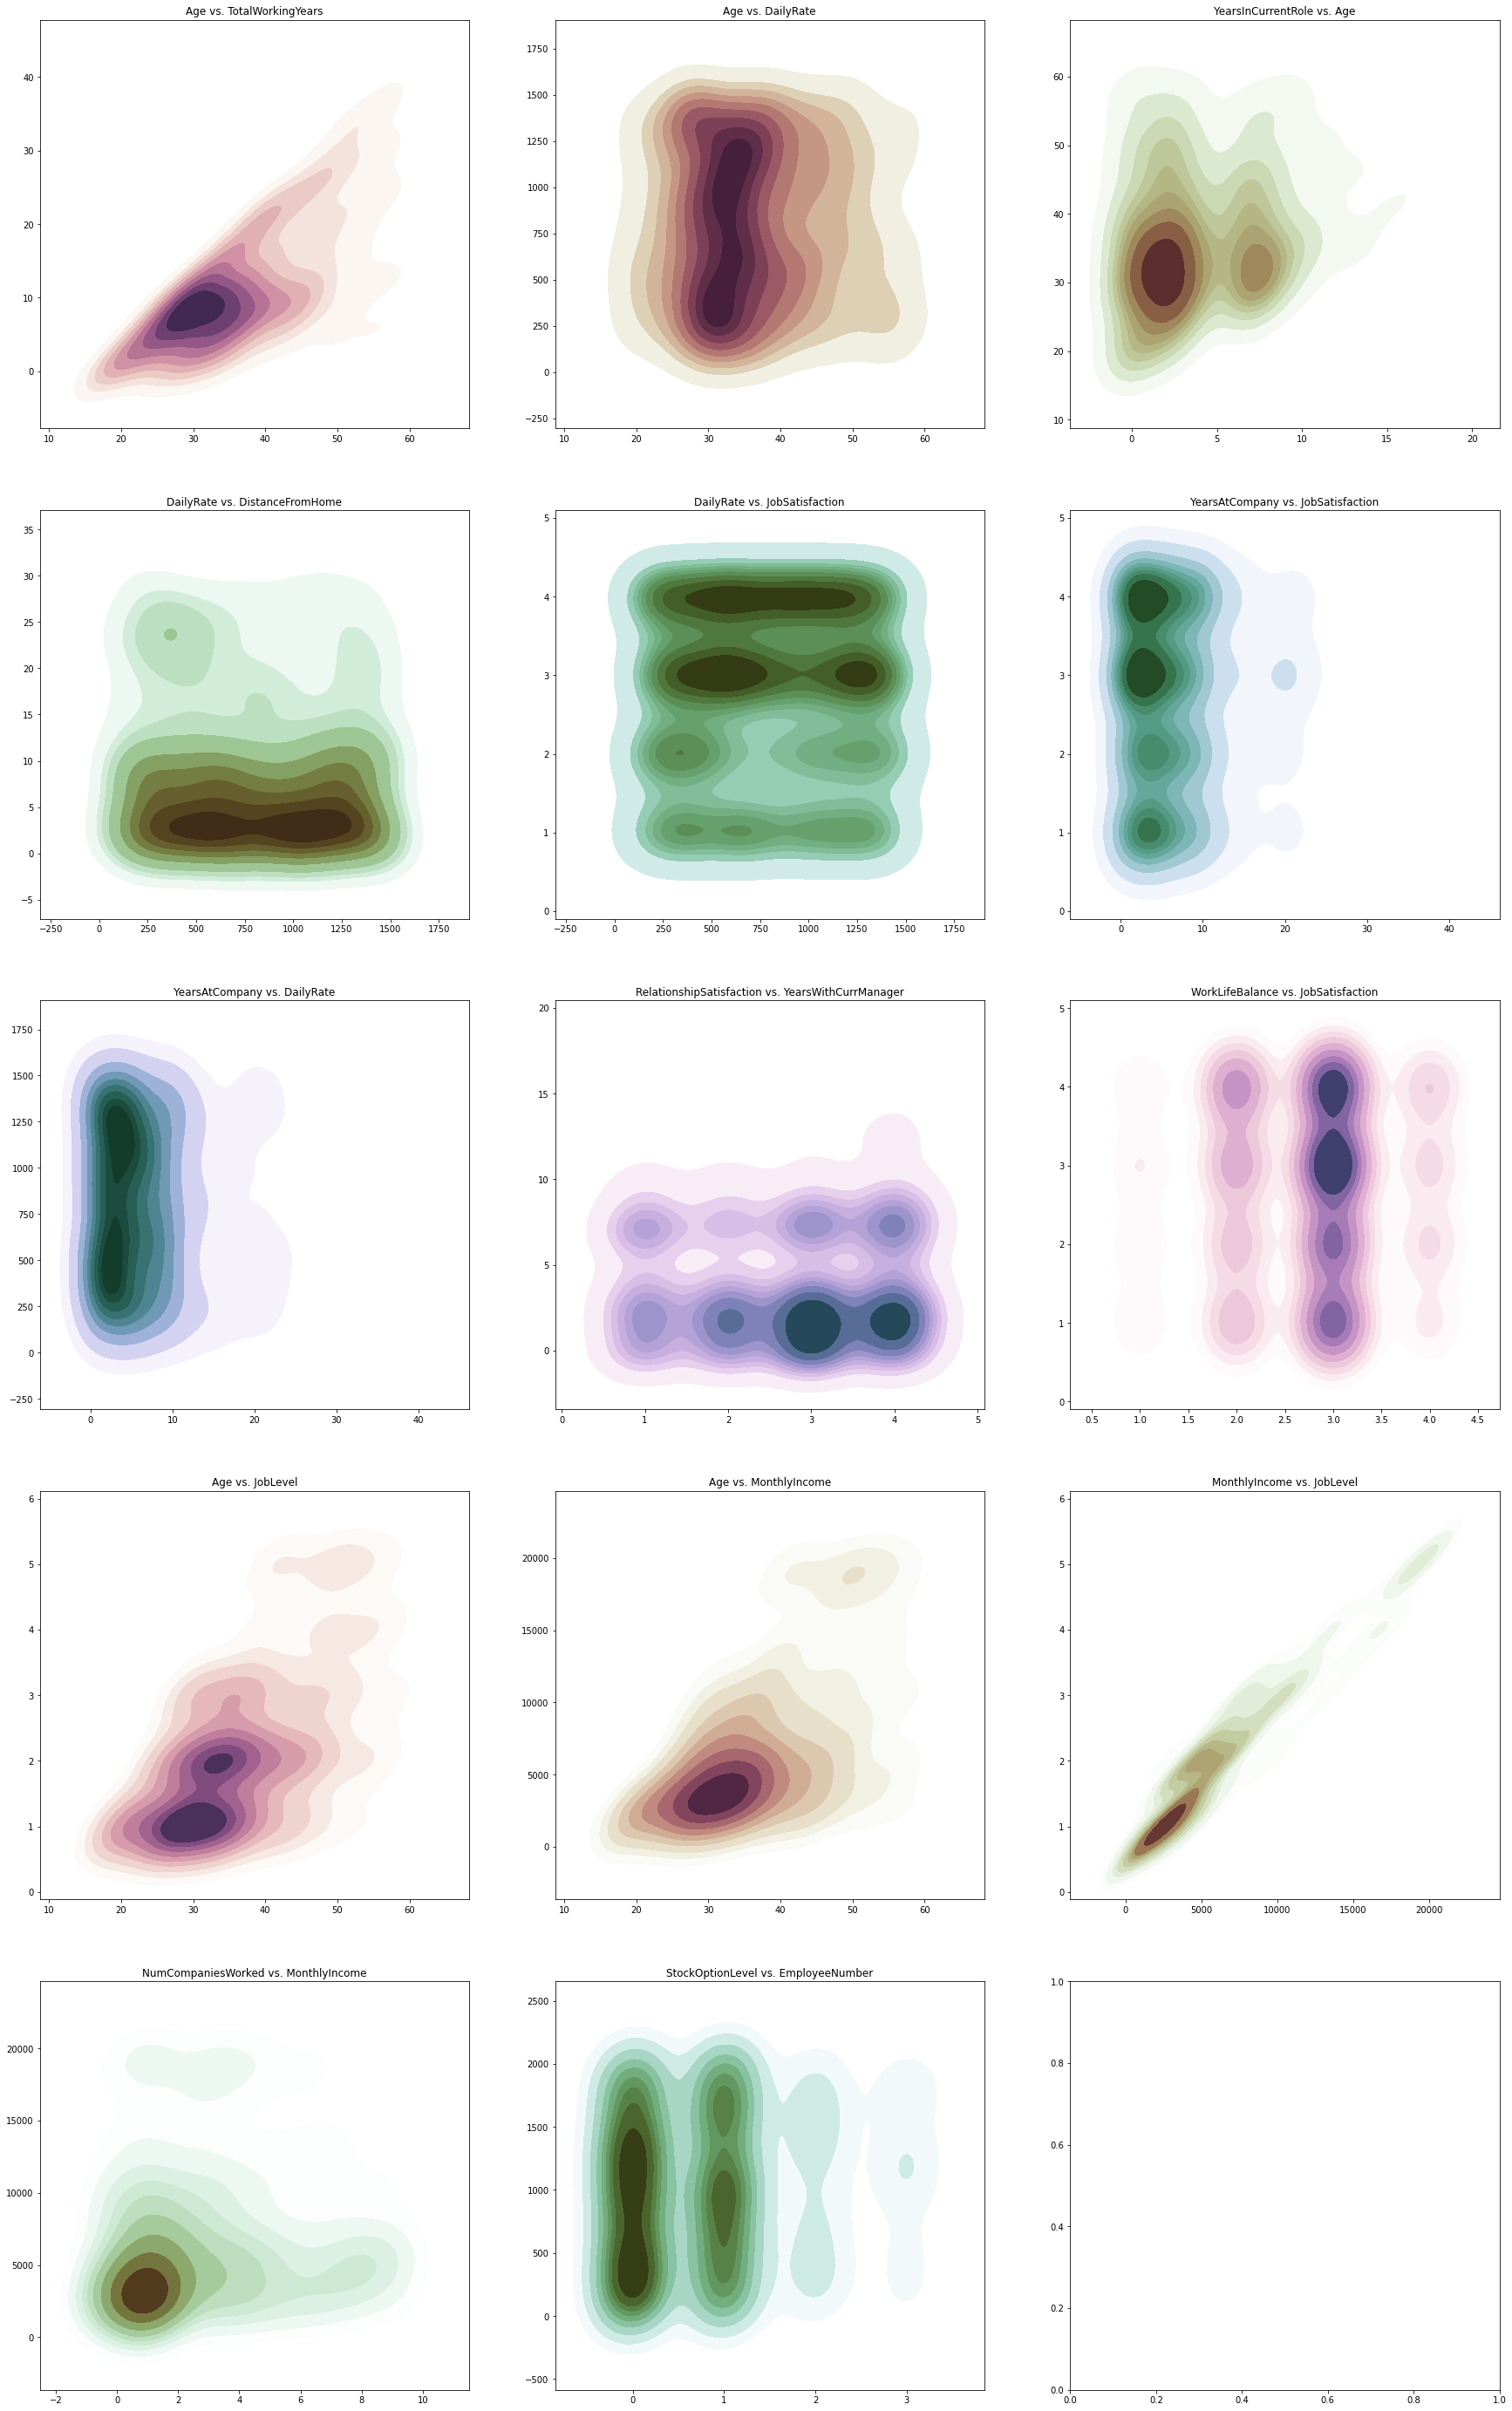

In [9]:
# Creating subplots
f, axes = plt.subplots(5, 3, figsize=(30,50), sharex=False, sharey=False)

# Set color palette
color_start = 0.0
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label):
    global color_start, cmap, axes, axes_x, axes_y
    x = emp_turnover[x_label].values
    y = emp_turnover[y_label].values
    sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title='{} vs. {}'.format(x_label, y_label))
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1
    color_start = color_start + 0.33
    cmap = sns.cubehelix_palette(start=color_start, light=1, as_cmap=True)


plot_xy('Age', 'TotalWorkingYears')
plot_xy('Age', 'DailyRate')
plot_xy('YearsInCurrentRole', 'Age')
plot_xy('DailyRate', 'DistanceFromHome')
plot_xy('DailyRate', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'DailyRate')
plot_xy('RelationshipSatisfaction', 'YearsWithCurrManager')
plot_xy('WorkLifeBalance', 'JobSatisfaction')
plot_xy('Age', 'JobLevel')
plot_xy('Age', 'MonthlyIncome')
plot_xy('MonthlyIncome', 'JobLevel')
plot_xy('NumCompaniesWorked', 'MonthlyIncome')
plot_xy('StockOptionLevel', 'EmployeeNumber')

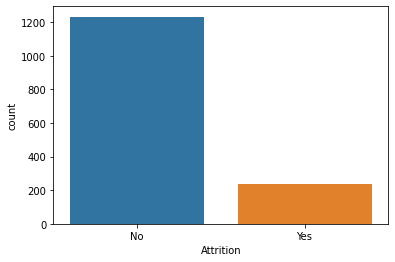

In [10]:
# Convert attrition to numericals
target_map = {'Yes':1, 'No':0}
emp_turnover[u'Attrition_num'] = emp_turnover[u'Attrition'].apply(lambda x: target_map[x])

sns.countplot(x='Attrition', data=attrition)

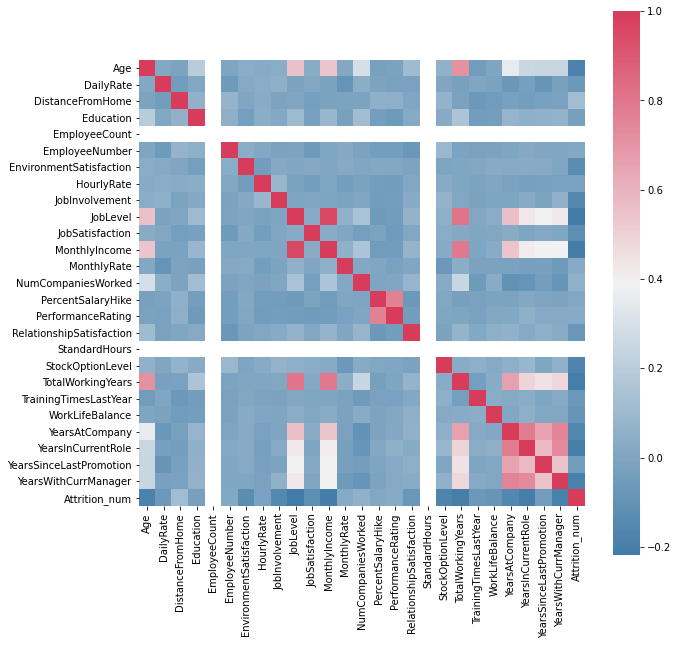

In [11]:
# Remove non-numerical columns
attrition_numerical_cols = emp_turnover._get_numeric_data()
corr = attrition_numerical_cols.corr()

# Graph heatmap to visualize correlations between data
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 5, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, ax=ax)

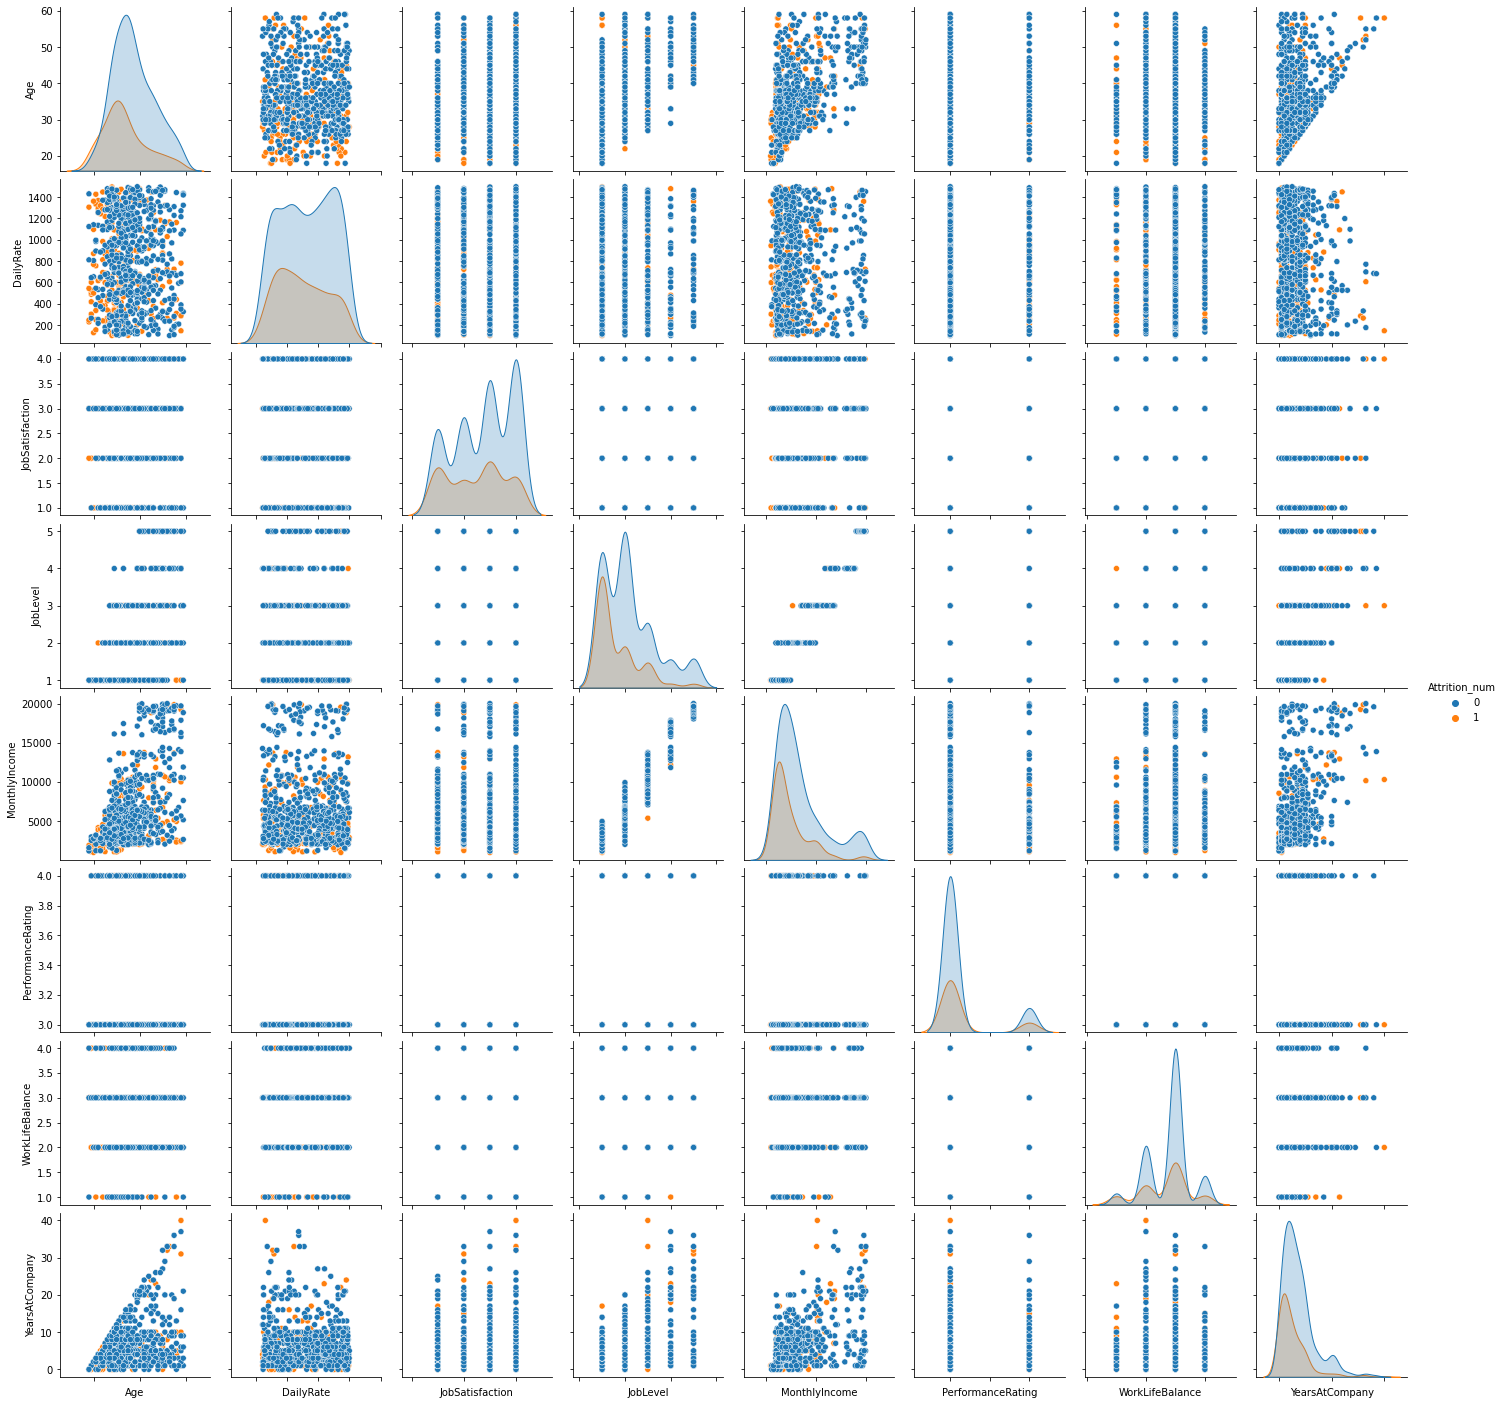

In [12]:
numerical = ['Age', 'DailyRate', 'JobSatisfaction', 'JobLevel', 'MonthlyIncome', 'PerformanceRating', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_num']

# Plot pairplot to visualize correlations
g = sns.pairplot(emp_turnover[numerical], hue='Attrition_num')
g.set(xticklabels=[])

In [14]:
categorical = emp_turnover.select_dtypes(include=['object'])
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1119,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,Yes
1414,Yes,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Divorced,Y,Yes
623,Yes,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,No
510,Yes,Travel_Frequently,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
143,Yes,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,Yes
...,...,...,...,...,...,...,...,...,...
1462,No,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,No
660,No,Travel_Rarely,Human Resources,Human Resources,Female,Human Resources,Married,Y,No
33,No,Non-Travel,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
1030,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No


In [15]:
numerical = attrition_numerical_cols.drop(u'Attrition_num', 1)
numerical

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1119,40,299,25,4,1,1318,4,57,2,3,2,9094,17235,2,12,3,3,80,0,9,2,3,5,4,1,0
1414,37,807,6,4,1,133,3,63,3,1,1,2073,23648,4,22,4,4,80,0,7,3,3,3,2,0,2
623,49,1184,11,3,1,840,3,43,3,3,4,7654,5860,1,18,3,1,80,2,9,3,4,9,8,7,7
510,42,481,12,3,1,1167,3,44,3,4,1,13758,2447,0,12,3,2,80,0,22,2,2,21,9,13,14
143,58,781,2,1,1,918,4,57,2,1,4,2380,13384,9,14,3,4,80,1,3,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,29,738,9,5,1,455,2,30,2,1,4,3983,7621,0,17,3,3,80,0,4,2,3,3,2,2,2
660,39,141,3,3,1,760,3,44,4,2,2,6389,18767,9,15,3,3,80,1,12,3,1,8,3,3,6
33,30,829,1,1,1,292,3,88,2,3,3,8474,20925,1,22,4,3,80,0,12,2,3,11,8,5,8
1030,46,430,1,4,1,1069,4,40,3,5,4,19627,21445,9,17,3,4,80,2,23,0,3,2,2,2,2


In [16]:

categorical = pd.get_dummies(categorical)
categorical

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1119,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1414,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
623,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
510,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
143,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
660,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
33,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1030,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [17]:
pd.options.display.max_columns = None
input_data = pd.concat([numerical, categorical], axis=1)
input_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1119,40,299,25,4,1,1318,4,57,2,3,2,9094,17235,2,12,3,3,80,0,9,2,3,5,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1414,37,807,6,4,1,133,3,63,3,1,1,2073,23648,4,22,4,4,80,0,7,3,3,3,2,0,2,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
623,49,1184,11,3,1,840,3,43,3,3,4,7654,5860,1,18,3,1,80,2,9,3,4,9,8,7,7,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
510,42,481,12,3,1,1167,3,44,3,4,1,13758,2447,0,12,3,2,80,0,22,2,2,21,9,13,14,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
143,58,781,2,1,1,918,4,57,2,1,4,2380,13384,9,14,3,4,80,1,3,3,2,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,29,738,9,5,1,455,2,30,2,1,4,3983,7621,0,17,3,3,80,0,4,2,3,3,2,2,2,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
660,39,141,3,3,1,760,3,44,4,2,2,6389,18767,9,15,3,3,80,1,12,3,1,8,3,3,6,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
33,30,829,1,1,1,292,3,88,2,3,3,8474,20925,1,22,4,3,80,0,12,2,3,11,8,5,8,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1030,46,430,1,4,1,1069,4,40,3,5,4,19627,21445,9,17,3,4,80,2,23,0,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [18]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_scaled = min_max_scaler.fit_transform(input_data)
input_data_normalized = pd.DataFrame(np_scaled, columns=input_data.columns.values)
input_data_normalized

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.536585,0.141117,0.857143,0.75,0.0,0.637155,1.000000,0.385714,0.333333,0.50,0.333333,0.425750,0.607903,0.222222,0.071429,0.0,0.666667,0.0,0.000000,0.225,0.333333,0.666667,0.125,0.222222,0.066667,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.463415,0.505014,0.178571,0.75,0.0,0.063861,0.666667,0.471429,0.666667,0.00,0.000000,0.056029,0.865432,0.444444,0.785714,1.0,1.000000,0.0,0.000000,0.175,0.500000,0.666667,0.075,0.111111,0.000000,0.117647,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.756098,0.775072,0.357143,0.50,0.0,0.405902,0.666667,0.185714,0.666667,0.50,1.000000,0.349921,0.151112,0.111111,0.500000,0.0,0.000000,0.0,0.666667,0.225,0.500000,1.000000,0.225,0.444444,0.466667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.585366,0.271490,0.392857,0.50,0.0,0.564103,0.666667,0.200000,0.666667,0.75,0.000000,0.671353,0.014055,0.000000,0.071429,0.0,0.333333,0.0,0.000000,0.550,0.333333,0.333333,0.525,0.500000,0.866667,0.823529,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.975610,0.486390,0.035714,0.00,0.0,0.443638,1.000000,0.385714,0.333333,0.00,1.000000,0.072196,0.453257,1.000000,0.214286,0.0,1.000000,0.0,0.333333,0.075,0.500000,0.333333,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.268293,0.455587,0.285714,1.00,0.0,0.219642,0.333333,0.000000,0.333333,0.00,1.000000,0.156609,0.221830,0.000000,0.428571,0.0,0.666667,0.0,0.000000,0.100,0.333333,0.666667,0.075,0.111111,0.133333,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
783,0.512195,0.027937,0.071429,0.50,0.0,0.367199,0.666667,0.200000,1.000000,0.25,0.333333,0.283307,0.669424,1.000000,0.285714,0.0,0.666667,0.0,0.333333,0.300,0.500000,0.000000,0.200,0.166667,0.200000,0.352941,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
784,0.292683,0.520774,0.000000,0.00,0.0,0.140784,0.666667,0.828571,0.333333,0.50,0.666667,0.393102,0.756084,0.111111,0.785714,1.0,0.666667,0.0,0.000000,0.300,0.333333,0.666667,0.275,0.444444,0.333333,0.470588,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [19]:
input_data_labels = input_data_normalized[['Attrition_No', 'Attrition_Yes']]
input_data_nums = input_data_normalized.drop(['Attrition_Yes', 'Attrition_No'], axis=1)

training_data = input_data_nums[0:600]
training_labels = input_data_labels[0:600]

test_data = input_data_nums[600:]
test_labels = input_data_labels[600:]

training_data_batches = np.array_split(training_data, 10)
training_labels_batches = np.array_split(training_labels, 10)

for (data_batch, label_batch) in zip(training_data_batches, training_labels_batches):
    for (data, label) in zip(data_batch.values, label_batch.values):
        print(data, label)

Streaming output truncated to the last 5000 lines.
 1.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         1.
 0.        ] [0. 1.]
[0.04878049 0.01934097 0.10714286 0.5        0.         0.46395743
 0.         0.77142857 0.66666667 0.         0.         0.10342285
 0.43815758 0.11111111 0.57142857 0.         0.33333333 0.
 0.         0.025      0.33333333 0.66666667 0.025      0.
 0.         0.         0.         0.         1.         0.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.         1.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         1.
 0.        ] [0. 1.]
[0.29268293 0.16618911 0.89285714 0.75       0.         0.1441703
 0.66666667 0.31428571 0.33333333 0.25       0.         0.